In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\dgdl1\AppData\Local\Temp\ipykernel_21268\1654282320.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm25_m   = pm25.loc[idx].resample('M').mean()
C:\Users\dgdl1\AppData\Local\Temp\ipykernel_21268\1654282320.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm10_m   = pm10.loc[idx].resample('M').mean()
C:\Users\dgdl1\AppData\Local\Temp\ipykernel_21268\1654282320.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  asthma_m = asthma.loc[idx].resample('M').sum()



=== Seoul XGBoost Asthma 예측 ===
MSE: 53446831.1, RMSE: 7310.7, R2: -1.279


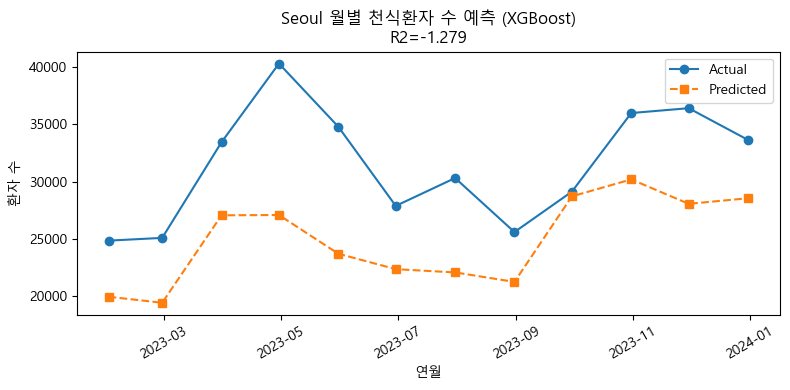


=== Busan XGBoost Asthma 예측 ===
MSE: 2747932.1, RMSE: 1657.7, R2: -0.077


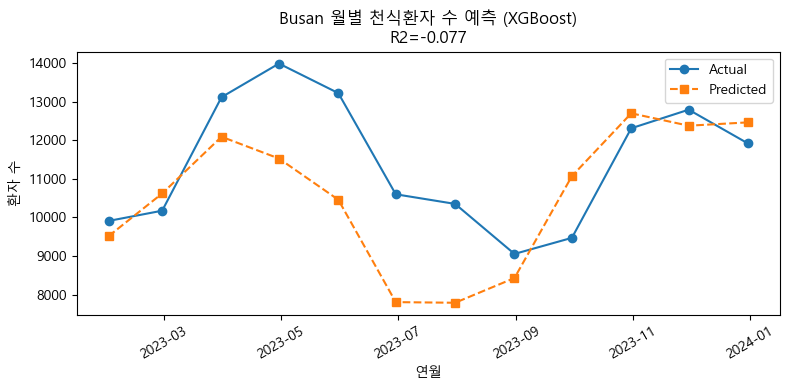


=== Daegu XGBoost Asthma 예측 ===
MSE: 2652095.8, RMSE: 1628.5, R2: -0.116


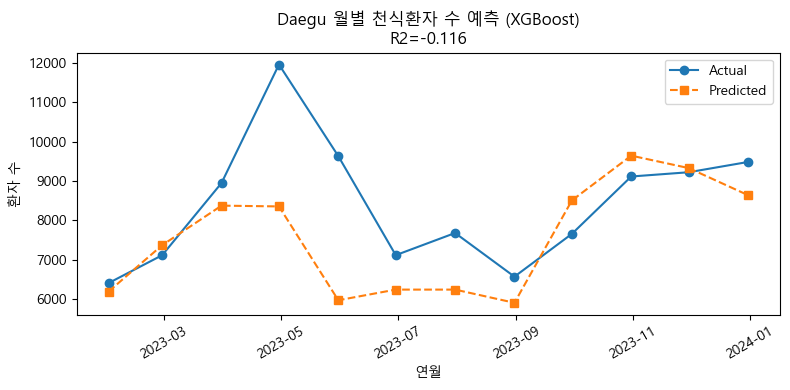


=== Pyeongtaek XGBoost Asthma 예측 ===
MSE: 574178.9, RMSE: 757.7, R2: -0.758


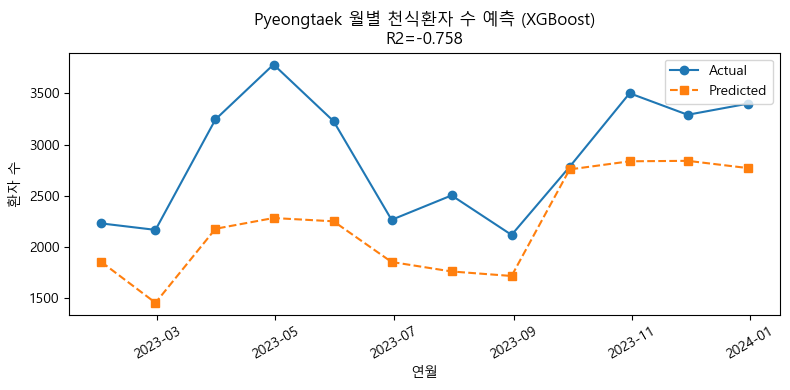


=== Seongnam XGBoost Asthma 예측 ===
MSE: 311105.3, RMSE: 557.8, R2: -0.176


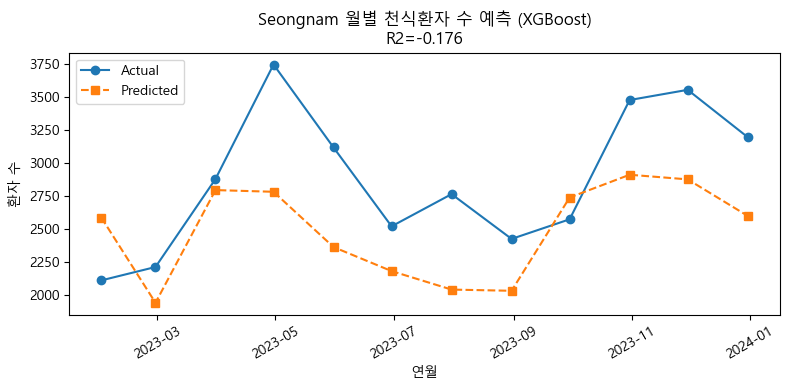


=== Gwangmyeong XGBoost Asthma 예측 ===
MSE: 34544.4, RMSE: 185.9, R2: -3.074


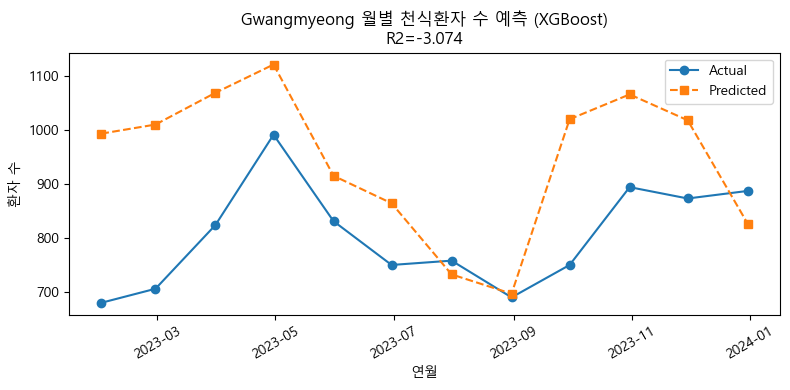


=== Siheung XGBoost Asthma 예측 ===
MSE: 221857.5, RMSE: 471.0, R2: -2.498


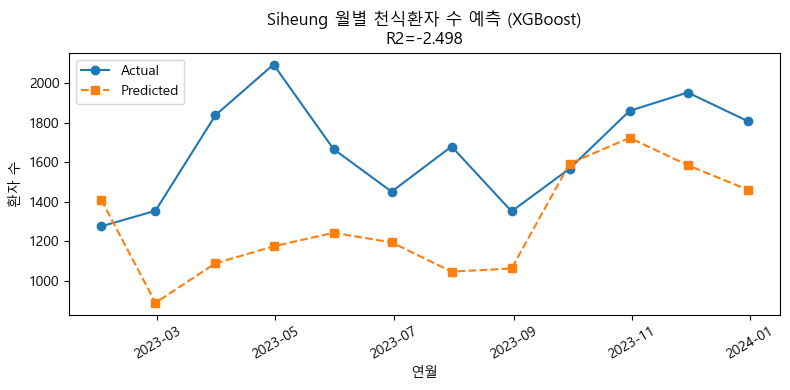

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기 및 월별 집계
asthma = pd.read_excel('Asthma_top30_Sum_removed_outliers.xlsx',
                       index_col=0, parse_dates=True)
pm25   = pd.read_excel('pm25_top30_fixed.xlsx',
                       index_col=0, parse_dates=True)
pm10   = pd.read_excel('pm10_top30_fixed.xlsx',
                       index_col=0, parse_dates=True)

# 2. 공통 날짜 동기화 및 월별 평균/합계
idx      = pm25.index.intersection(asthma.index).intersection(pm10.index)
pm25_m   = pm25.loc[idx].resample('M').mean()
pm10_m   = pm10.loc[idx].resample('M').mean()
asthma_m = asthma.loc[idx].resample('M').sum()

# 3. 예측할 도시 리스트
cities = ['Seoul','Busan','Daegu','Pyeongtaek','Seongnam','Gwangmyeong','Siheung']

for city in cities:
    print(f"\n=== {city} XGBoost Asthma 예측 ===")
    # 4. 도시별 데이터프레임 생성 및 결측 제거
    df = pd.DataFrame({
        'pm25'  : pm25_m[city],
        'pm10'  : pm10_m[city],
        'asthma': asthma_m[city]
    }).dropna()
    
    # 5. 연도·월 피처 추가
    df['year']  = df.index.year
    df['month'] = df.index.month
    
    # 6. 특징(X)과 타깃(y) 정의
    X = df[['year','month','pm25','pm10']]
    y = df['asthma']
    
    # 7. train/test 분리 (마지막 12개월을 테스트)
    train_X, test_X = X.iloc[:-12], X.iloc[-12:]
    train_y, test_y = y.iloc[:-12], y.iloc[-12:]
    
    # 8. 스케일링
    scaler = StandardScaler()
    train_X_s = scaler.fit_transform(train_X)
    test_X_s  = scaler.transform(test_X)
    
    # 9. XGBoost 모델 학습
    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    )
    model.fit(train_X_s, train_y)
    
    # 10. 예측 및 성능 평가
    pred_y = model.predict(test_X_s)
    mse   = mean_squared_error(test_y, pred_y)
    rmse  = np.sqrt(mse)
    r2    = r2_score(test_y, pred_y)
    print(f"MSE: {mse:.1f}, RMSE: {rmse:.1f}, R2: {r2:.3f}")
    
    # 11. 실제 vs 예측 시각화
    plt.figure(figsize=(8,4))
    plt.plot(test_y.index, test_y,  'o-', label='Actual')
    plt.plot(test_y.index, pred_y,  's--', label='Predicted')
    plt.title(f"{city} 월별 천식환자 수 예측 (XGBoost)\nR2={r2:.3f}")
    plt.xlabel('연월')
    plt.ylabel('환자 수')
    plt.legend()
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


C:\Users\dgdl1\AppData\Local\Temp\ipykernel_21268\2992717114.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm25_m   = pm25.loc[idx].resample('M').mean()
C:\Users\dgdl1\AppData\Local\Temp\ipykernel_21268\2992717114.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm10_m   = pm10.loc[idx].resample('M').mean()
C:\Users\dgdl1\AppData\Local\Temp\ipykernel_21268\2992717114.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  asthma_m = asthma.loc[idx].resample('M').sum()



=== Ansan Asthma 예측 with lag/cum features ===
MSE: 650978.0, RMSE: 806.8, R2: -1.888


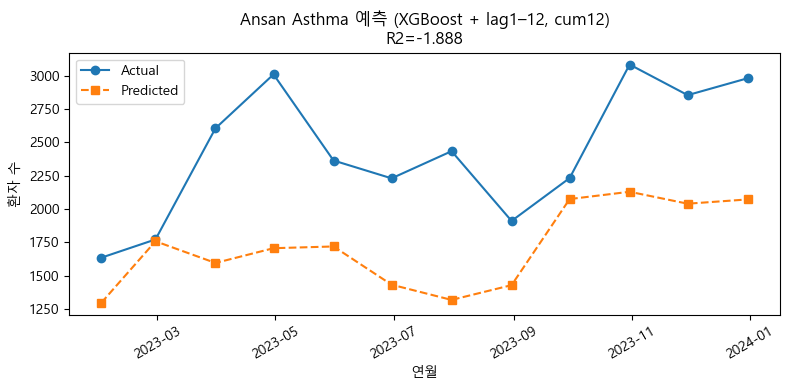


=== Anyang Asthma 예측 with lag/cum features ===
MSE: 417110.1, RMSE: 645.8, R2: -3.521


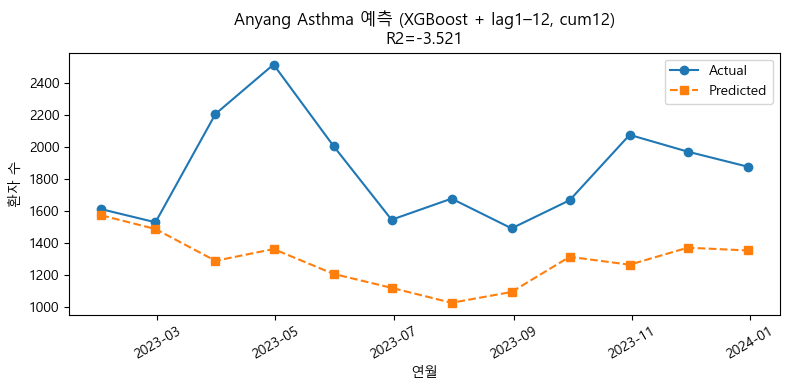


=== Bucheon Asthma 예측 with lag/cum features ===
MSE: 621117.1, RMSE: 788.1, R2: -1.403


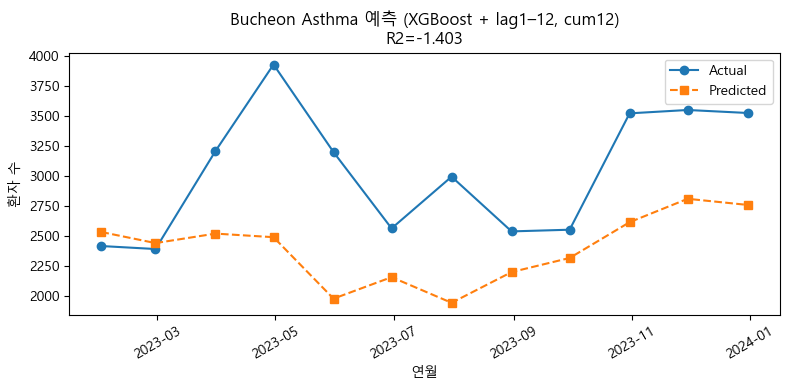


=== Busan Asthma 예측 with lag/cum features ===
MSE: 15812843.1, RMSE: 3976.5, R2: -5.197


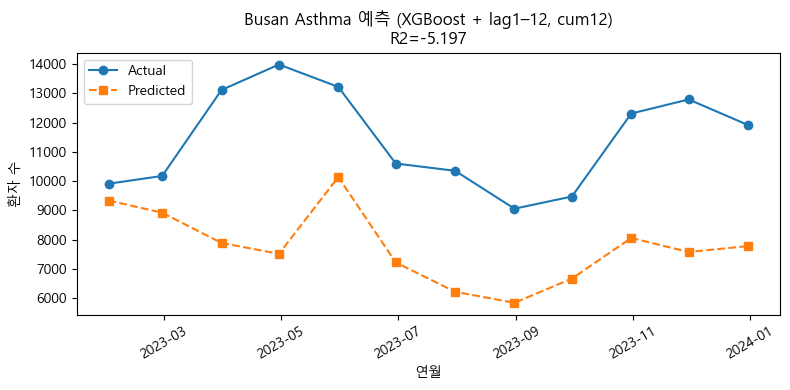


=== Cheongju Asthma 예측 with lag/cum features ===
MSE: 968081.0, RMSE: 983.9, R2: -1.067


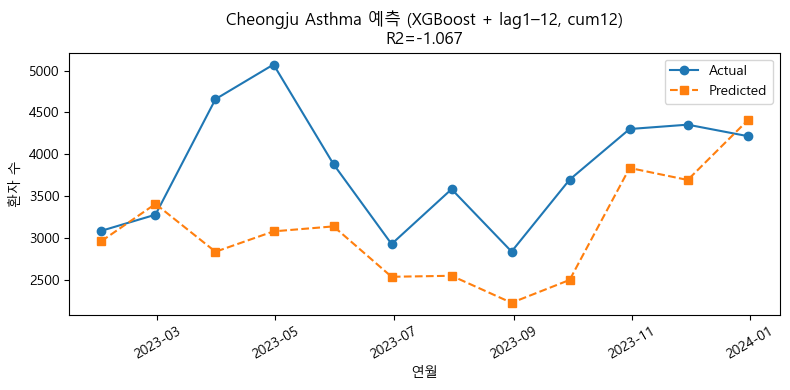


=== Daegu Asthma 예측 with lag/cum features ===
MSE: 3955089.7, RMSE: 1988.7, R2: -0.664


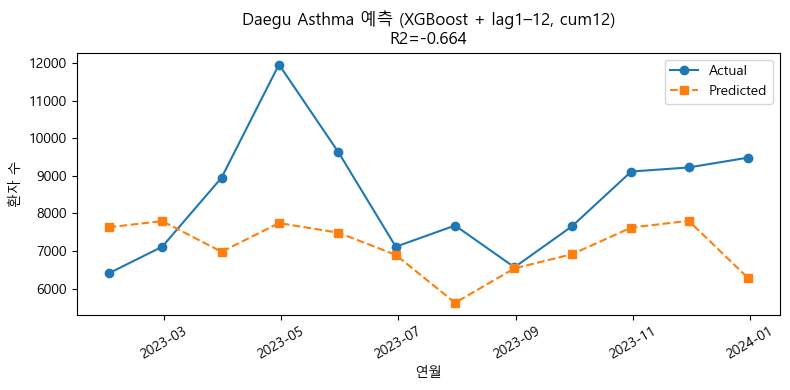


=== Daejeon Asthma 예측 with lag/cum features ===
MSE: 1277809.8, RMSE: 1130.4, R2: -0.629


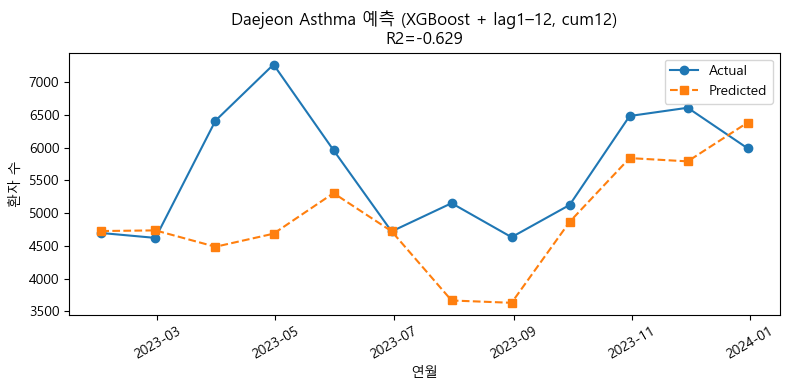


=== Dongducheon Asthma 예측 with lag/cum features ===
MSE: 1442.5, RMSE: 38.0, R2: -1.285


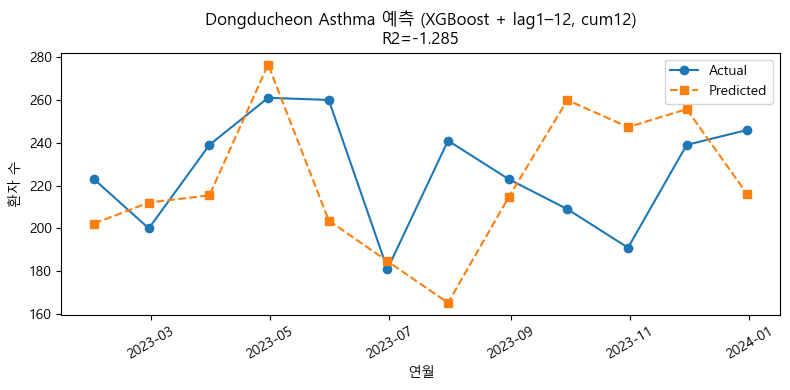


=== Goyang Asthma 예측 with lag/cum features ===
MSE: 1835252.1, RMSE: 1354.7, R2: -3.542


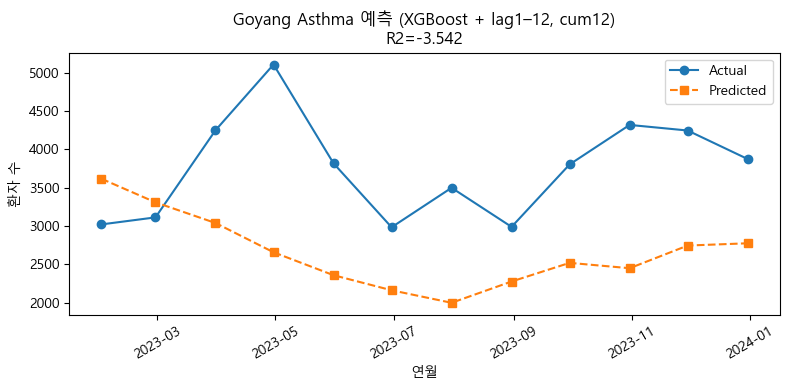


=== Gunpo Asthma 예측 with lag/cum features ===
MSE: 81223.0, RMSE: 285.0, R2: -2.755


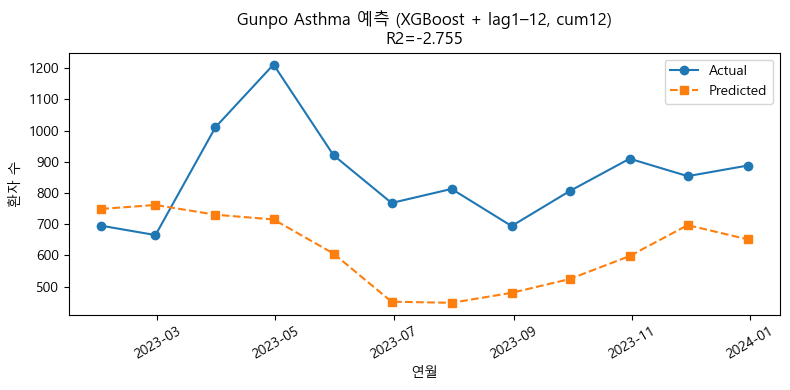


=== Guri Asthma 예측 with lag/cum features ===
MSE: 66325.0, RMSE: 257.5, R2: -3.525


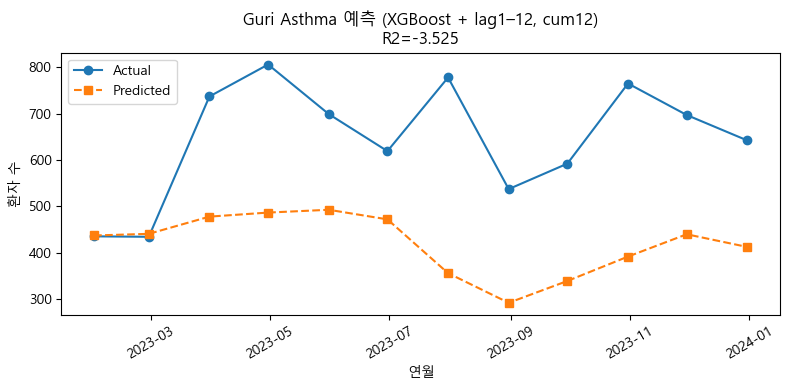


=== Gwacheon Asthma 예측 with lag/cum features ===
MSE: 5603.7, RMSE: 74.9, R2: -2.695


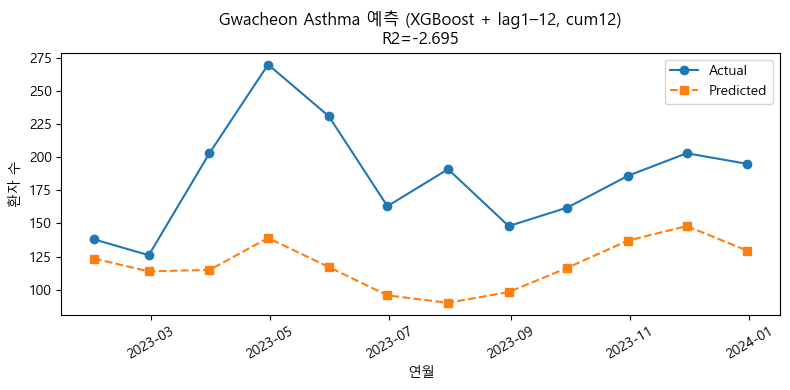


=== Gwangju Asthma 예측 with lag/cum features ===
MSE: 3723393.2, RMSE: 1929.6, R2: -3.050


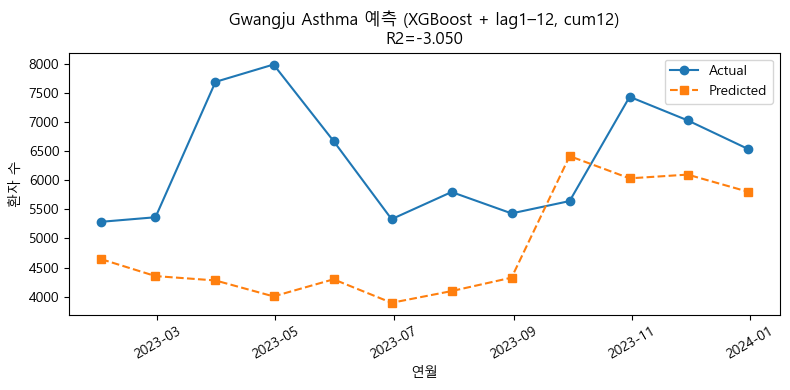


=== Gwangmyeong Asthma 예측 with lag/cum features ===
MSE: 5237.6, RMSE: 72.4, R2: 0.382


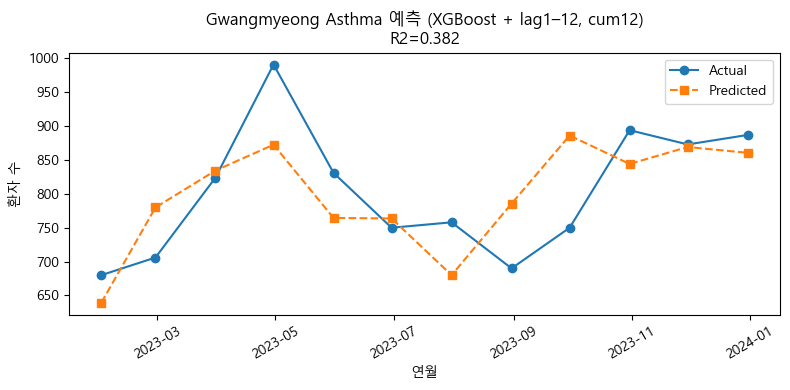


=== Hwaseong Asthma 예측 with lag/cum features ===
MSE: 1526980.4, RMSE: 1235.7, R2: -3.551


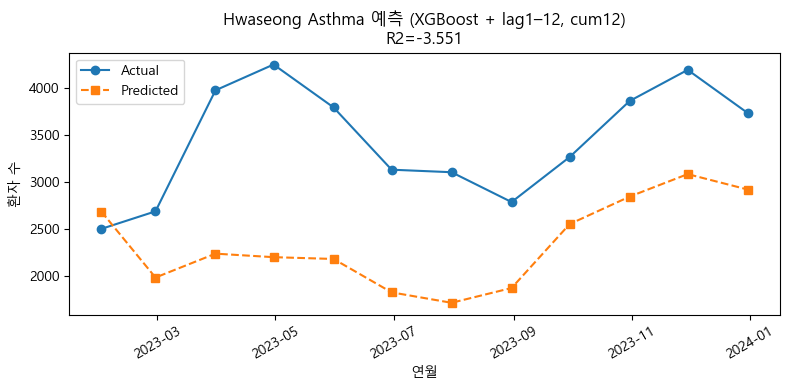


=== Icheon Asthma 예측 with lag/cum features ===
MSE: 55999.9, RMSE: 236.6, R2: -4.536


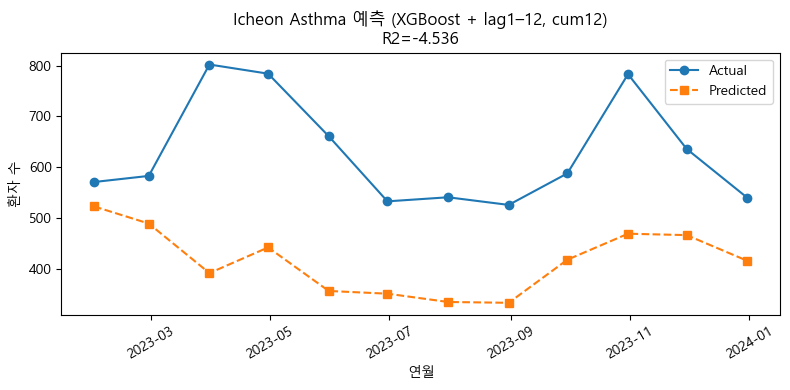


=== Iksan Asthma 예측 with lag/cum features ===
MSE: 128361.9, RMSE: 358.3, R2: -1.899


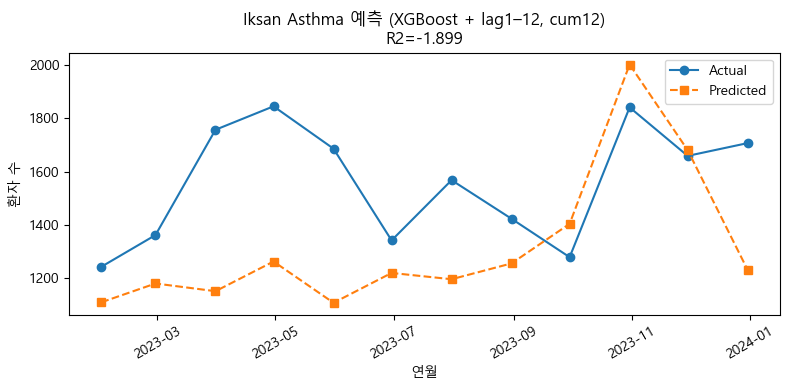


=== Incheon Asthma 예측 with lag/cum features ===
MSE: 10978888.3, RMSE: 3313.4, R2: -2.445


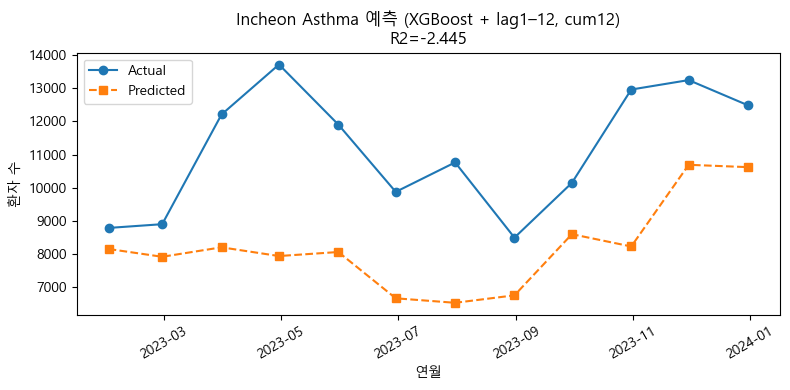


=== Jeongeup Asthma 예측 with lag/cum features ===
MSE: 15395.0, RMSE: 124.1, R2: -2.381


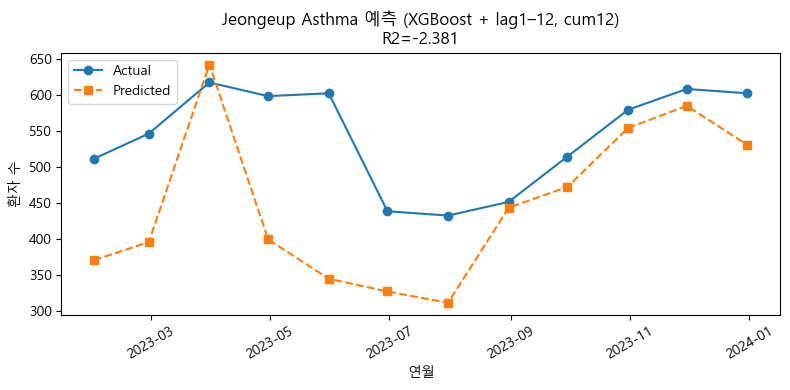


=== Osan Asthma 예측 with lag/cum features ===
MSE: 91253.1, RMSE: 302.1, R2: -2.037


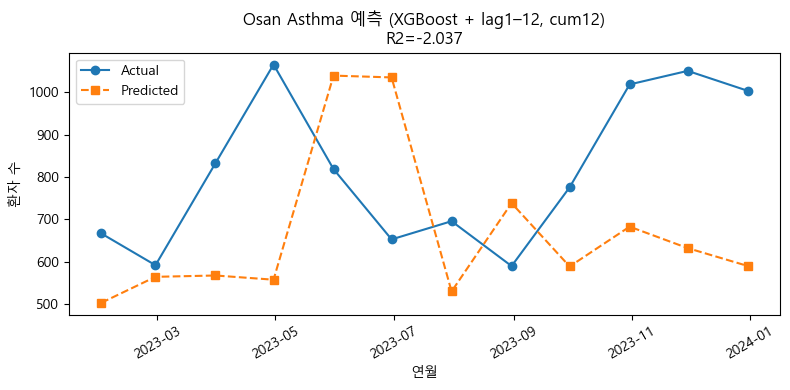


=== Paju Asthma 예측 with lag/cum features ===
MSE: 261823.8, RMSE: 511.7, R2: -0.303


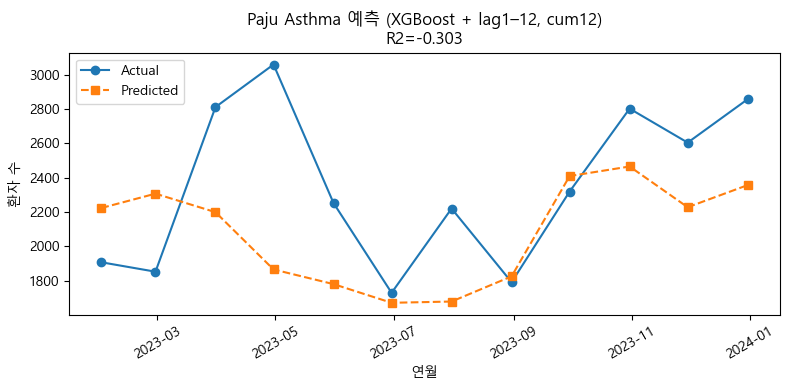


=== Pocheon Asthma 예측 with lag/cum features ===
MSE: 9984.3, RMSE: 99.9, R2: -1.075


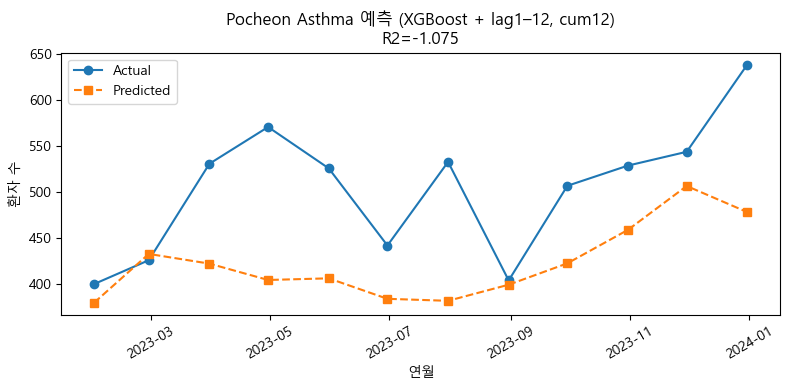


=== Pyeongtaek Asthma 예측 with lag/cum features ===
MSE: 1206197.6, RMSE: 1098.3, R2: -2.692


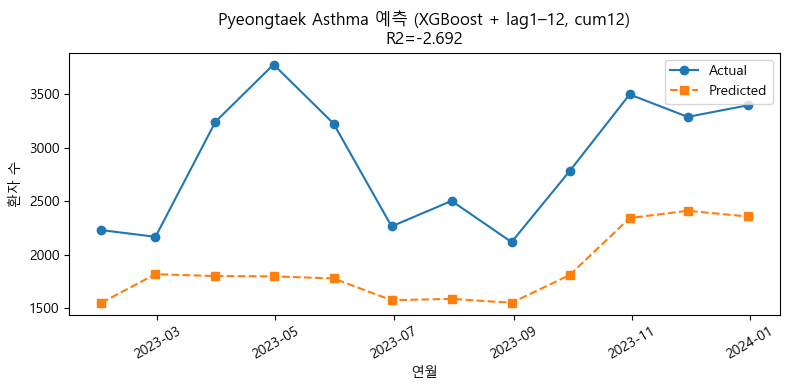


=== Seongnam Asthma 예측 with lag/cum features ===
MSE: 496644.7, RMSE: 704.7, R2: -0.877


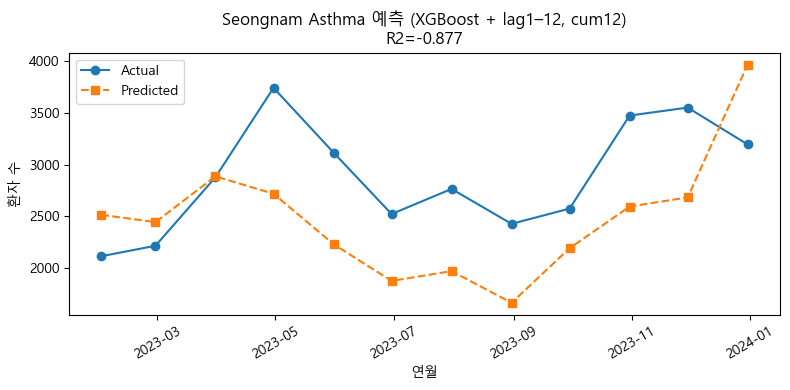


=== Seoul Asthma 예측 with lag/cum features ===
MSE: 72838440.9, RMSE: 8534.5, R2: -2.106


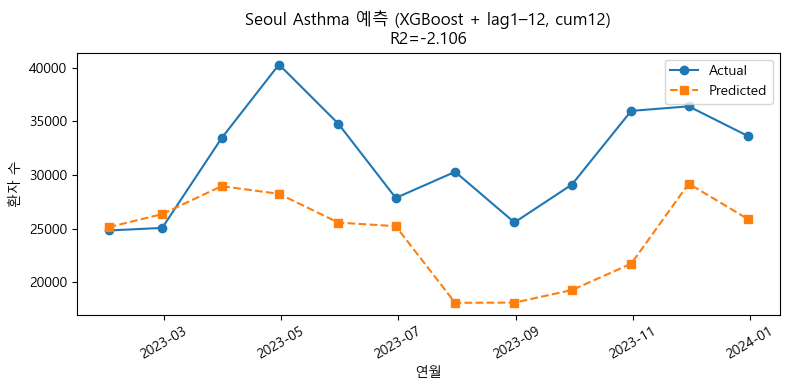


=== Siheung Asthma 예측 with lag/cum features ===
MSE: 301343.9, RMSE: 548.9, R2: -3.751


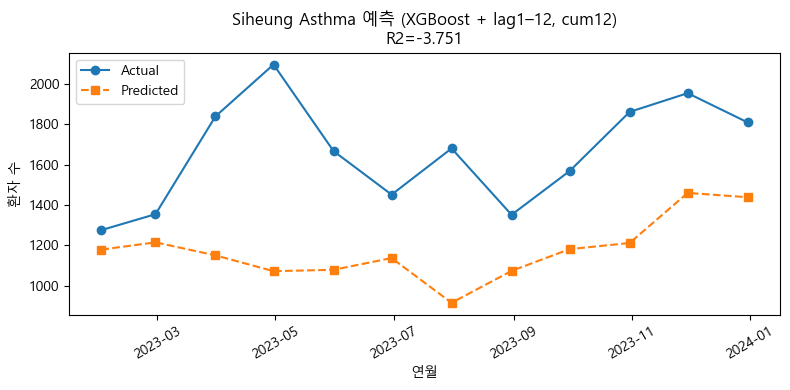


=== Suwon Asthma 예측 with lag/cum features ===
MSE: 4255550.2, RMSE: 2062.9, R2: -4.043


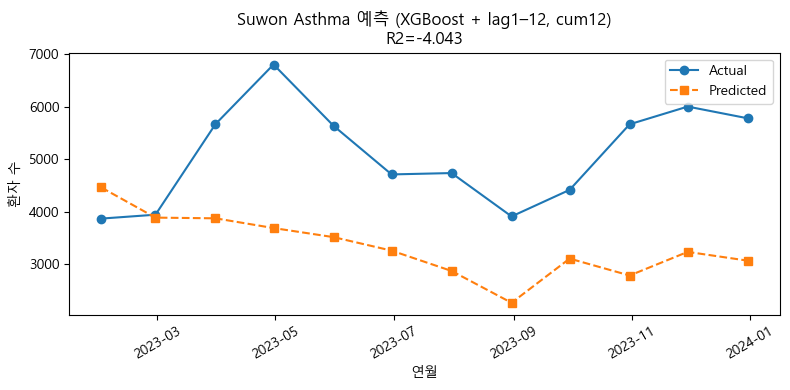


=== Uijeongbu Asthma 예측 with lag/cum features ===
MSE: 121879.5, RMSE: 349.1, R2: -1.137


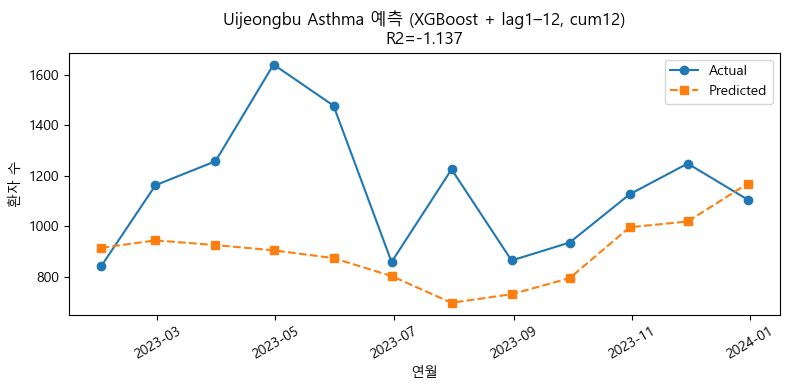


=== Uiwang Asthma 예측 with lag/cum features ===
MSE: 29650.2, RMSE: 172.2, R2: -1.041


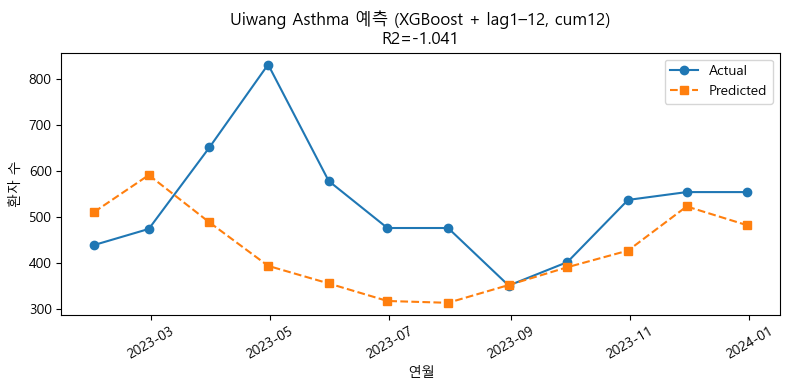


=== Ulsan Asthma 예측 with lag/cum features ===
MSE: 3441762.1, RMSE: 1855.2, R2: -3.382


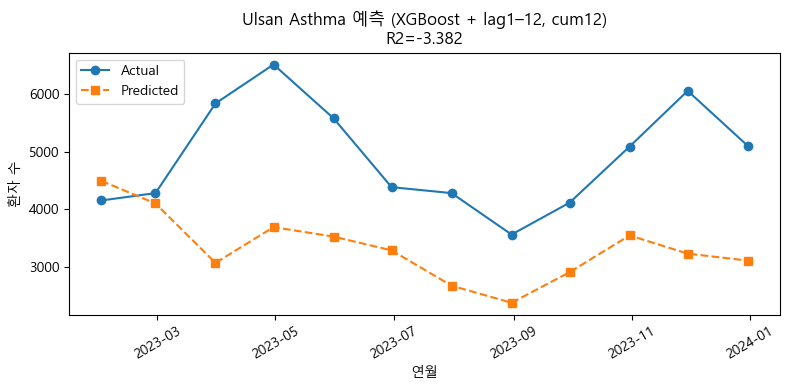


=== Wonju Asthma 예측 with lag/cum features ===
MSE: 49069.7, RMSE: 221.5, R2: -1.766


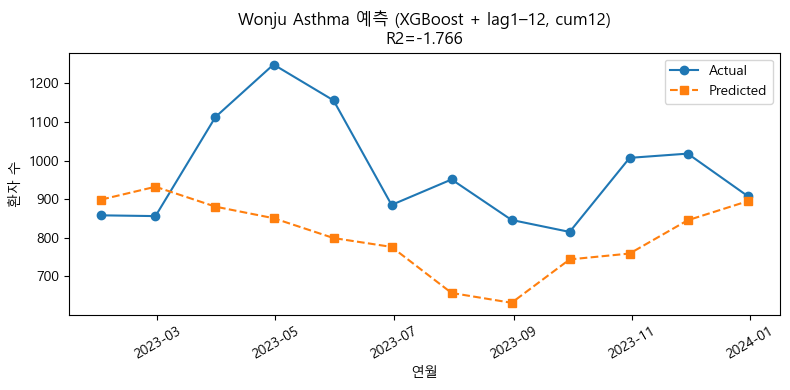


=== Yangju Asthma 예측 with lag/cum features ===
MSE: 420330.5, RMSE: 648.3, R2: -8.898


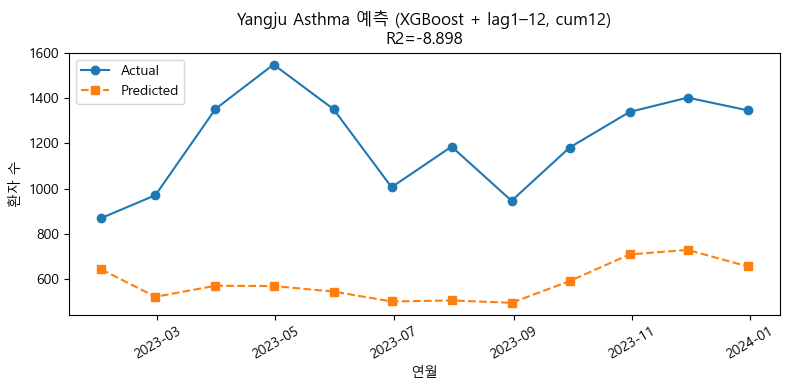


=== Yeongju Asthma 예측 with lag/cum features ===
MSE: 5511.8, RMSE: 74.2, R2: -0.242


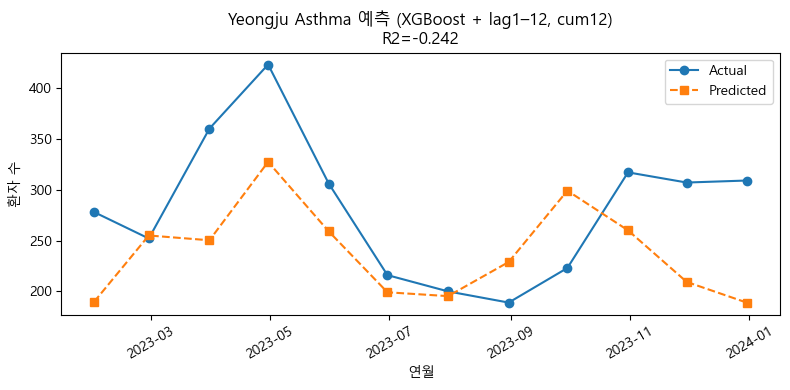


=== Yongin Asthma 예측 with lag/cum features ===
MSE: 2567588.6, RMSE: 1602.4, R2: -4.173


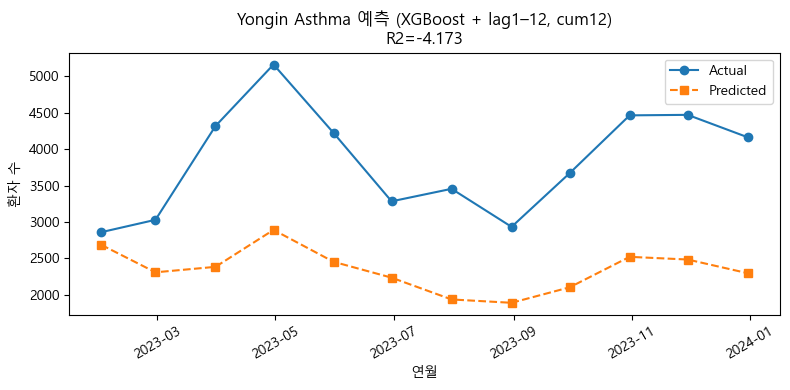

In [5]:
# XGB + lag, cumulative 예측입니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1) 데이터 로드 및 월별 집계
asthma = pd.read_excel('Asthma_top30_Sum_removed_outliers.xlsx',
                       index_col=0, parse_dates=True)
pm25   = pd.read_excel('pm25_top30_fixed.xlsx',
                       index_col=0, parse_dates=True)
pm10   = pd.read_excel('pm10_top30_fixed.xlsx',
                       index_col=0, parse_dates=True)

idx      = pm25.index.intersection(asthma.index).intersection(pm10.index)
pm25_m   = pm25.loc[idx].resample('M').mean()
pm10_m   = pm10.loc[idx].resample('M').mean()
asthma_m = asthma.loc[idx].resample('M').sum()

# 2) 분석할 도시 리스트 (공통 컬럼만)
cities = sorted(set(asthma_m.columns) & set(pm25_m.columns) & set(pm10_m.columns))

# 3) lag·누적 범위 설정
max_lag = 12

for city in cities:
    print(f'\n=== {city} Asthma 예측 with lag/cum features ===')
    # a) 기본 DataFrame 준비
    df = pd.DataFrame({'asthma': asthma_m[city]})
    
    # b) PM2.5 lag1~lag12 + cum12
    for lag in range(1, max_lag+1):
        df[f'pm25_lag{lag}'] = pm25_m[city].shift(lag)
    df[f'pm25_cum{max_lag}'] = pm25_m[city].rolling(window=max_lag, min_periods=1).sum()
    
    # c) PM10 lag1~lag12 + cum12
    for lag in range(1, max_lag+1):
        df[f'pm10_lag{lag}'] = pm10_m[city].shift(lag)
    df[f'pm10_cum{max_lag}'] = pm10_m[city].rolling(window=max_lag, min_periods=1).sum()
    
    # d) 캘린더 피처: 연도·월
    df['year']  = df.index.year
    df['month'] = df.index.month
    
    # e) 결측 제거
    df = df.dropna()
    
    # f) 특성과 타깃 분리
    X = df.drop(columns=['asthma'])
    y = df['asthma']
    
    # g) train/test 분리 (마지막 12개월 테스트)
    train_X, test_X = X.iloc[:-12], X.iloc[-12:]
    train_y, test_y = y.iloc[:-12], y.iloc[-12:]
    
    # h) 스케일링
    scaler = StandardScaler()
    train_X_s = scaler.fit_transform(train_X)
    test_X_s  = scaler.transform(test_X)
    
    # i) XGBoost 모델 학습
    model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    )
    model.fit(train_X_s, train_y)
    
    # j) 예측 및 성능 평가
    pred_y = model.predict(test_X_s)
    mse   = mean_squared_error(test_y, pred_y)
    rmse  = np.sqrt(mse)
    r2    = r2_score(test_y, pred_y)
    print(f"MSE: {mse:.1f}, RMSE: {rmse:.1f}, R2: {r2:.3f}")
    
    # k) 실제 vs 예측 시각화
    plt.figure(figsize=(8,4))
    plt.plot(test_y.index, test_y,  'o-', label='Actual')
    plt.plot(test_y.index, pred_y,  's--', label='Predicted')
    plt.title(f"{city} Asthma 예측 (XGBoost + lag1–12, cum12)\nR2={r2:.3f}")
    plt.xlabel('연월')
    plt.ylabel('환자 수')
    plt.legend()
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
